In [2]:

import torch
from torch import nn
import traintools


2025-08-20 00:50:54,734 - INFO - NumExpr defaulting to 16 threads.


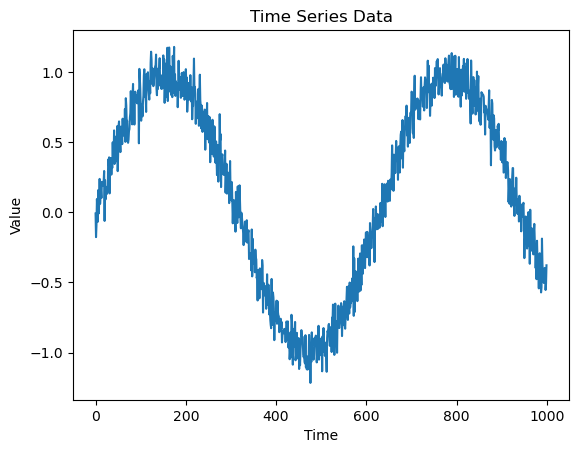

In [3]:
T = 1000
time = torch.arange(T,dtype=torch.float32)
x = torch.sin(time * 0.01) + torch.normal(0, 0.1, (T,), dtype=torch.float32)

# 绘制图像
import matplotlib.pyplot as plt
plt.plot(time, x)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


In [ ]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
	features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape(-1, 1)


tensor([[-0.0090, -0.1772, -0.0937,  0.0945],
        [-0.1772, -0.0937,  0.0945,  0.0006],
        [-0.0937,  0.0945,  0.0006, -0.0676],
        ...,
        [-0.5039, -0.4137, -0.3972, -0.4404],
        [-0.4137, -0.3972, -0.4404, -0.5539],
        [-0.3972, -0.4404, -0.5539, -0.5095]])
tensor([[ 6.4497e-04],
        [-6.7618e-02],
        [ 1.5847e-01],
        [-8.6277e-03],
        [ 6.9770e-02],
        [ 2.3760e-01],
        [ 5.9913e-02],
        [ 1.1857e-01],
        [ 1.5220e-01],
        [ 1.0153e-01],
        [ 2.1659e-01],
        [ 1.9584e-01],
        [ 1.8714e-01],
        [ 2.1167e-01],
        [ 2.2603e-01],
        [ 2.9398e-01],
        [-6.1978e-02],
        [ 2.2830e-01],
        [ 9.1121e-02],
        [ 1.8153e-01],
        [ 1.7337e-01],
        [ 1.3007e-01],
        [ 1.7659e-01],
        [ 1.7061e-01],
        [ 3.7595e-01],
        [ 3.3417e-01],
        [ 3.9106e-01],
        [ 1.3407e-01],
        [ 3.0861e-01],
        [ 3.1244e-01],
        [ 3.8663e-01

In [5]:
batch_size ,n_train = 16, 1024
# 只有前 n_train 个样本用于训练
train_iter = traintools.load_array((features[:n_train], labels[:n_train]), batch_size,is_train=True)

def init_weights(m):
	if type(m) == nn.Linear:
		nn.init.xavier_uniform_(m.weight)

def get_net():
	net = nn.Sequential(
		nn.Linear(4,10),
		nn.ReLU(),
		nn.Linear(10,1)
	)
	net.apply(init_weights)
	return net

loss = nn.MSELoss()

def train(net,train_iter,loss,epochs,lr):
	trainer = torch.optim.Adam(net.parameters(), lr=lr)
	for epoch in range(epochs):
		for X,y in train_iter:
			trainer.zero_grad()
			y_hat = net(X)
			l = loss(y_hat, y)
			l.backward()
			trainer.step()
		print(f"Epoch {epoch + 1}, Loss: {l.item():.4f}")
net = get_net()
train(net, train_iter, loss, epochs=10, lr=0.01)

Epoch 1, Loss: 0.0302
Epoch 2, Loss: 0.0345
Epoch 3, Loss: 0.0051
Epoch 4, Loss: 0.0066
Epoch 5, Loss: 0.0071
Epoch 6, Loss: 0.0215
Epoch 7, Loss: 0.0118
Epoch 8, Loss: 0.0352
Epoch 9, Loss: 0.0024
Epoch 10, Loss: 0.0060


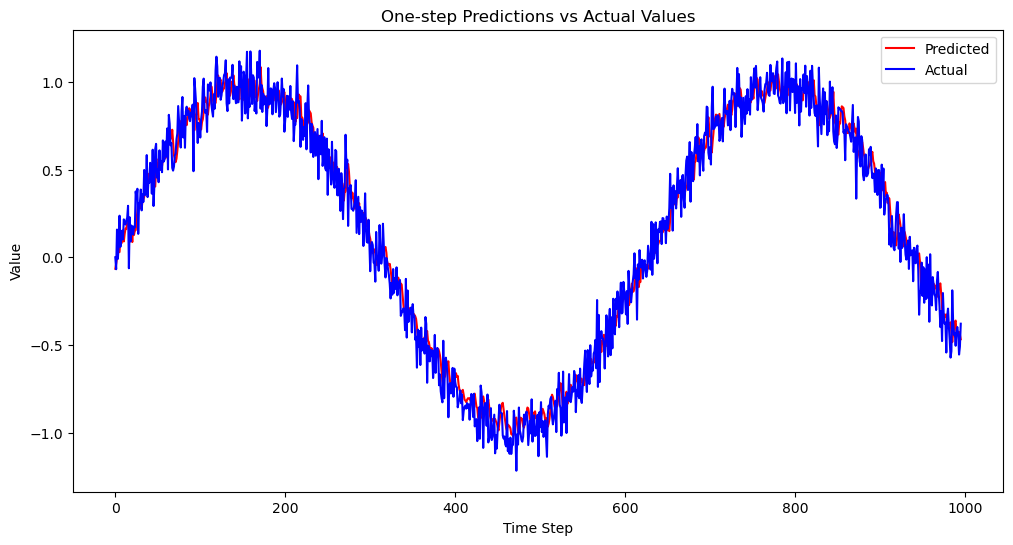

In [6]:
onestep_preds = net(features)
# 绘制预测值和真实值的对比图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(onestep_preds.detach().numpy(), label='Predicted', color='red')
plt.plot(labels.detach().numpy(), label='Actual', color='blue')
plt.title('One-step Predictions vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


In [1]:
import collections
import re
import traintools

2025-08-20 15:43:27,576 - INFO - NumExpr defaulting to 16 threads.


In [2]:
traintools.DATA_HUB['time_machine'] = (
	traintools.DATA_URL + 'timemachine.txt',
	'090b5e7e70c295757f55df93cb0a180b9691891a'
)

def read_time_machine():
    with open(traintools.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()

In [3]:
print(f'# 文本总行数: {len(lines)}')
print(lines[0])
print(lines[10])
print(lines[-1])

# 文本总行数: 3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the
of man


In [4]:


tokens = traintools.tokenize(lines, 'word')

In [5]:
tokens

[['the', 'time', 'machine', 'by', 'h', 'g', 'wells'],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 [],
 ['the',
  'time',
  'traveller',
  'for',
  'so',
  'it',
  'will',
  'be',
  'convenient',
  'to',
  'speak',
  'of',
  'him'],
 ['was',
  'expounding',
  'a',
  'recondite',
  'matter',
  'to',
  'us',
  'his',
  'grey',
  'eyes',
  'shone',
  'and'],
 ['twinkled',
  'and',
  'his',
  'usually',
  'pale',
  'face',
  'was',
  'flushed',
  'and',
  'animated',
  'the'],
 ['fire',
  'burned',
  'brightly',
  'and',
  'the',
  'soft',
  'radiance',
  'of',
  'the',
  'incandescent'],
 ['lights',
  'in',
  'the',
  'lilies',
  'of',
  'silver',
  'caught',
  'the',
  'bubbles',
  'that',
  'flashed',
  'and'],
 ['passed',
  'in',
  'our',
  'glasses',
  'our',
  'chairs',
  'being',
  'his',
  'patents',
  'embraced',
  'and'],
 ['caressed',
  'us',
  'rather',
  'than',
  'submitted',
  'to',
  'be',
  'sat',
  'upon',
  'and',
  'there',
  'was',
  'that'],
 ['luxurious',
  'after',
  'dinner',

In [ ]:
from numpy import sort


class Vocab:
	def __init__(self,tokens = None,min_freq =0,reserved_tokens=None):

		if tokens is None:
			tokens = []

		if reserved_tokens is None:
			reserved_tokens = []

		self._token_freqs = self.count_corpus(tokens)
		self._token_freqs = sorted(self.token_freqs.items(), key=lambda x: x[1], reverse=True)
		self.idx_to_token = ['<unk>'] + reserved_tokens
		self.token_to_idx = {token: idx for idx, token in enumerate(self.idx_to_token)}
		for token,freq in self._token_freqs:
			if freq >= min_freq and token not in self.token_to_idx:
				self.idx_to_token.append(token)
				self.token_to_idx[token] = len(self.idx_to_token) - 1
			

	def __len__(self):
		return len(self.idx_to_token)
	
	def __getitem__(self, tokens):
		if not isinstance(tokens, (list, tuple)): 	# 如果是单个token
			return self.token_to_idx.get(tokens, self.unk)
		# 如果是多个token
		return [self.__getitem__(token) for token in tokens]

	def to_tokens(self, indices):
		if not isinstance(indices, (list, tuple)): # 如果是单个索引
			return self.idx_to_token[indices]
		# 如果是多个索引
		return [self.idx_to_token[idx] for idx in indices]

	@property
	def unk(self):
		return 0

	@property
	def token_freqs(self):
		return self._token_freqs

	def count_corpus(self,tokens):
		# 将tokens展平
		if len(tokens) == 0 or isinstance(tokens[0], list):
			tokens = [token for sublist in tokens for token in sublist]
		return collections.Counter(tokens)

In [21]:
vocab = Vocab(tokens)
print(f'词表大小: {len(vocab)}')
print(list(vocab.token_to_idx.items())[:10])  # 打印前10个词和对应的索引

for i in range(11):
    print(f'词: {tokens[i]}, 索引: {vocab[tokens[i]]}')

词表大小: 4580
[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]
词: ['the', 'time', 'machine', 'by', 'h', 'g', 'wells'], 索引: [1, 19, 50, 40, 2183, 2184, 400]
词: [], 索引: []
词: [], 索引: []
词: [], 索引: []
词: [], 索引: []
词: ['i'], 索引: [2]
词: [], 索引: []
词: [], 索引: []
词: ['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him'], 索引: [1, 19, 71, 16, 37, 11, 115, 42, 680, 6, 586, 4, 108]
词: ['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and'], 索引: [7, 1420, 5, 2185, 587, 6, 126, 25, 330, 127, 439, 3]
词: ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the'], 索引: [2186, 3, 25, 1044, 362, 113, 7, 1421, 3, 1045, 1]


In [23]:

def load_time_machine(max_tokens = -1):
	lines = read_time_machine()
	tokens = traintools.tokenize(lines, 'char')
	vocab = Vocab(tokens)

	# 将所有token展平
	corpus = [token for sublist in tokens for token in sublist]

	if max_tokens > 0:
		corpus = corpus[:max_tokens]

	return corpus, vocab


In [26]:
corpus,vocab = load_time_machine()
len(corpus), len(vocab)

print(f'前10个字符: {corpus[:10]}')
print(f'前10个字符的索引: {[vocab[c] for c in corpus[:10]]}')

前10个字符: ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']
前10个字符的索引: [3, 9, 2, 1, 3, 5, 13, 2, 1, 13]
